In [50]:
import pandas as pd

In [51]:
t1 = pd.read_csv('./Scores/score_true_1.csv')
t2 = pd.read_csv('./Scores/score_true_2.csv')
t3 = pd.read_csv('./Scores/score_true_3.csv')
t4 = pd.read_csv('./Scores/score_true_4.csv')
t5 = pd.read_csv('./Scores/score_true_5.csv')

In [52]:
t = t1.append(t2, ignore_index=True)
t = t.append(t3, ignore_index=True)
t = t.append(t4, ignore_index=True)
t = t.append(t5, ignore_index=True)

In [53]:
f1 = pd.read_csv('./Scores/score_fake_1.csv')
f2 = pd.read_csv('./Scores/score_fake_2.csv')
f3 = pd.read_csv('./Scores/score_fake_3.csv')
f4 = pd.read_csv('./Scores/score_fake_4.csv')
f5 = pd.read_csv('./Scores/score_fake_5_final.csv')

In [54]:
f = f1.append(f2, ignore_index=True)
f = f.append(f3, ignore_index=True)
f = f.append(f4, ignore_index=True)
f = f.append(f5, ignore_index=True)

In [55]:
t

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
0,72.727273,0.727273,0.953870
1,36.363636,0.363636,0.774581
2,63.636364,0.636364,0.784848
3,35.714286,0.357143,0.656921
4,50.000000,0.500000,0.835293
...,...,...,...
491,50.000000,0.500000,0.862707
492,50.000000,0.500000,0.914262
493,50.000000,0.500000,0.962881
494,50.000000,0.500000,0.759484


In [56]:
f

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
0,7.692308,0.076923,0.466115
1,0.000000,0.000000,0.473237
2,11.111111,0.111111,0.431902
3,0.000000,0.000000,0.458282
4,0.000000,0.052632,0.428630
...,...,...,...
435,18.181818,0.181818,0.551623
436,0.000000,0.000000,0.569780
437,0.000000,0.000000,0.386376
438,0.000000,0.000000,0.446706


In [57]:
f.describe()

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
count,440.000000,440.000000,440.000000
mean,5.322903,0.066918,0.481351
std,9.264591,0.102923,0.089222
min,0.000000,0.000000,0.252077
25%,0.000000,0.000000,0.419097
50%,0.000000,0.000000,0.473283
75%,8.333333,0.100000,0.537061
max,66.666667,0.666667,0.851502


In [58]:
t.describe()

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
count,496.000000,496.000000,496.000000
mean,56.576971,0.572698,0.834562
std,22.492661,0.220917,0.116151
min,0.000000,0.000000,0.356027
25%,46.666667,0.470588,0.779659
50%,58.114035,0.600000,0.845111
75%,66.666667,0.685033,0.914260
max,100.000000,1.000000,1.000000


In [59]:
label = []
gt = []
for idx in range(len(t)):
    gt.append(1)
#     print(t['sbertSimilarity_score_true'][idx])
    if t['sbertSimilarity_score_true'][idx] > 0.75:
        label.append(1)
    else:
        label.append(0)

In [60]:
for idx in range(len(f)):
    gt.append(0)
#     print(f['sbertSimilarity_score_true'][idx])
    if f['sbertSimilarity_score_true'][idx] > 0.75:
        label.append(1)
    else:
        label.append(0)

In [61]:
len(label), len(gt)

(936, 936)

In [62]:
sum(acc), sum(gt)

(429, 496)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [64]:
accuracy_score(gt, label)

0.9027777777777778

In [65]:
confusion_matrix(gt, label)

array([[434,   6],
       [ 85, 411]])

In [66]:
f1_score(gt, label)

0.900328587075575

In [67]:
import matplotlib.pyplot as plt
import numpy as np

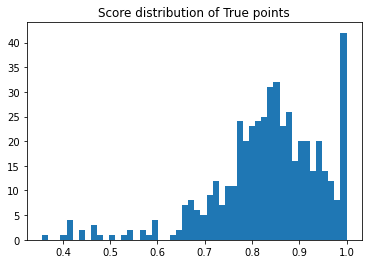

In [78]:
plt.hist(t['sbertSimilarity_score_true'], bins=50)
plt.savefig('true_plot.pdf')
plt.title("Score distribution of True points")
plt.show()

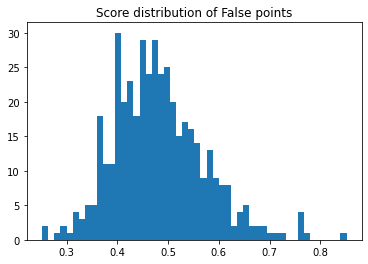

In [79]:
plt.hist(f['sbertSimilarity_score_true'], bins=50)
plt.savefig('false_plot.pdf')
plt.title("Score distribution of False points")
plt.show()